In [28]:
import networkx
from matplotlib import pyplot as plt
import numpy as np
import enzope
from enzope.graphs.graph_class import GTG
import os

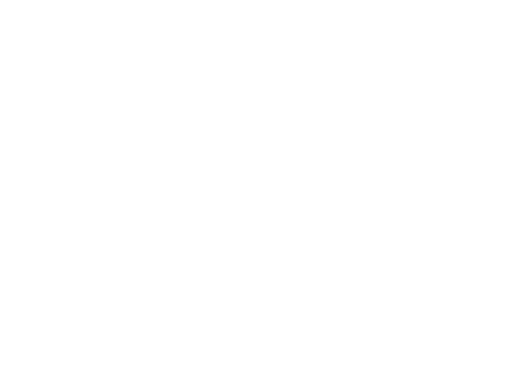

In [114]:
limits = plt.axis('off')

In [29]:
figpath = os.path.join(os.getcwd(), 'figs')

In [40]:
posi = {i: [np.random.uniform(0, 1), np.random.uniform(0, 1)] for i in range(100)}

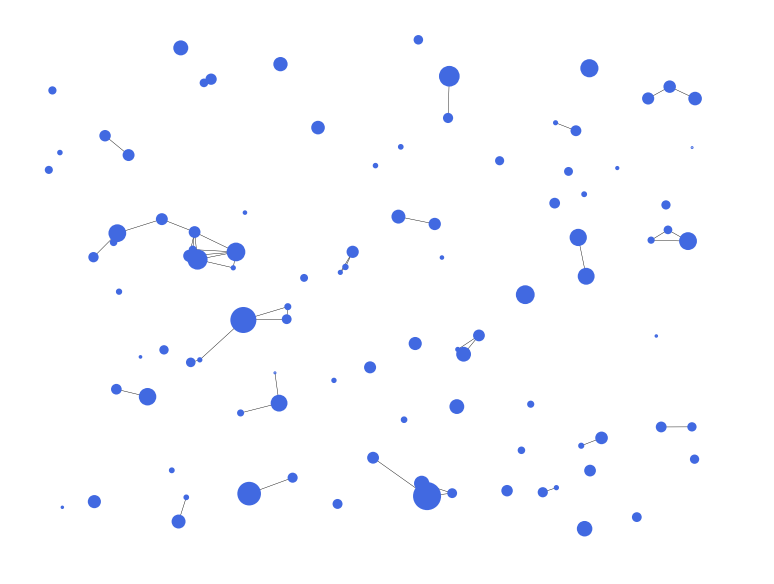

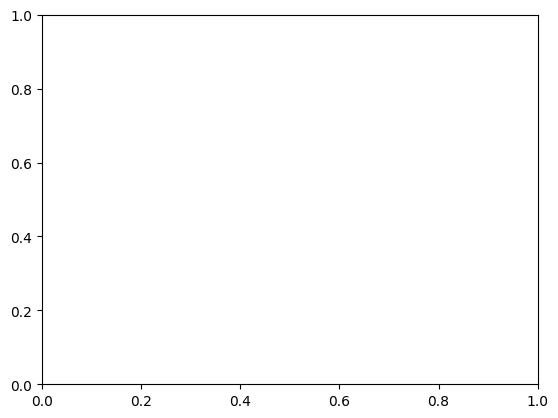

In [118]:
n_nodes = 100
w0 = {i: .5 for i in range(n_nodes)}
g = GTG(n_nodes, theta=500, posi=posi, seed=9, plotable=True)
plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()
g.ax.axis('off')
g.plot_snapshot()
# g.fig.savefig(os.path.join(figpath, 'paso3_theta=5e1.png'), dpi=300, transparent=True)